<center>
    
    The basics of linear algebra
    
    Author: Daniel Coble
</center>

Linear algebra is the study of vectors and matrices. (Formally, it's the study of vector spaces and linear tranformations). A solid understanding of linear algebra is necessary for everything else in the starter project (and the rest of your research career). Sadly, the only way to know something is to study it. I've provided a few resources below that I think are good sources. Be sure you have a firm understanding of:
1. The definition of a matrix and vector.
2. Matrix-vector and matrix-matrix multiplication.
3. The principle of linearity.
4. Solving Ax=b.
5. Matrix inverses.

[MIT OpenCourseWare](https://www.youtube.com/playlist?list=PLE7DDD91010BC51F8). Gil Strang's lecture series is a classic. Relevant material: lectures 1-10.

[3Blue1Brown Essence of Linear Algebra](https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab) 3Blue1Brown's videos emphasize developing a visual, intuitive understanding of linear algebra. Relevant material: Chapters 1-5, 7, 8, 13.

[Prof. Matthew Ballard's course notes](https://544.f21.matthewrobertballard.com/notes/solving_linear_systems/intro/). Prof. Ballard's material thoroughly covers an introductory linear algebra course. Be warned: the material is for math majors and so rigorous/proof-based. Relevant material: Solving linear systems.

Let's start with coding a matrix-vector multiplication by hand. We'll place the matrix and vector inside numpy arrays.

In [1]:
import numpy as np
# Matrix A
A = np.array([
    [3, -4, 5],
    [5, -3, 6],
    [1, 2, -3]
])
n = A.shape[0]
m = A.shape[1]
# vector x
x = np.array([3, 2, 1])

# matrix product
y = np.zeros((m,))
for i in range(n):
    for j in range(m):
        y[i] += A[i,j]*x[j]

print(y)

[ 6. 15.  4.]


You can check by hand that this is the correct answer. Luckily we don't have to code this every time we want to multiply a matrix and vector. The symbol `@` can be used for matrix multiplication of numpy arrays. `@` also works for matrix-matrix multiplication.

In [2]:
y = A@x
print('y:', y)
# demonstrate matrix-matrix multiplication with @
B = np.array([
    [4, -2, 1],
    [5, -1, -5],
    [2, 1, 1]
])
C = A@B
print('C:', C)

y: [ 6 15  4]
C: [[  2   3  28]
 [ 17  -1  26]
 [  8  -7 -12]]


Let's work through an example that is actually useful. For a two-dimensional vector $v = (x, y)$, a rotation in the plane by angle $\theta$ can be done by the rotation matrix $R(\theta)$.
$$ R(\theta) = \begin{bmatrix} \cos(\theta) & -\sin(\theta) \\ \sin(\theta) & \cos(\theta) \end{bmatrix} $$

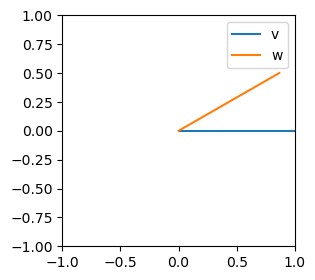

In [3]:
# experiment by changing these values.
x = 1
y = 0
theta = np.pi/6

Rtheta = np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta), np.cos(theta)]
])
v = np.array([x, y])

w = Rtheta@v

# plot
import matplotlib.pyplot as plt

plt.figure(figsize=(3,3))
plt.plot([0, v[0]], [0, v[1]], label='v')
plt.plot([0, w[0]], [0, w[1]], label='w')
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.legend()

Numpy also has the `linalg.inv()` function calculate matrix inverses. Let's use it to solve $Ax=b$.

In [4]:
b = np.array([-1, 3, 5])
Ainv = np.linalg.inv(A)
print('A^-1:', Ainv)
x = Ainv@b
print('x:', x)

A^-1: [[ 0.10714286  0.07142857  0.32142857]
 [-0.75        0.5        -0.25      ]
 [-0.46428571  0.35714286 -0.39285714]]
x: [ 1.71428571  1.         -0.42857143]


**Challenge Problems**
1. Code a matrix-matrix multiplication. Use that, and the matrix-vector multiplication code, to shown an example for the identity
$$ (AB)x=A(Bx) $$
2. Intuitively, we should be able to undo a rotation by $\theta$ with a rotation by $-\theta$. Use the definition of matrix multiplication and some trigonometric identities, to show that $R(\theta)^{-1}=R(-\theta)$.